In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/divyanshu132/Bank-Customer-Churn-Prediction/master/Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.dtypes

RowNumber          int64  
CustomerId         int64  
Surname            object 
CreditScore        int64  
Geography          object 
Gender             object 
Age                int64  
Tenure             int64  
Balance            float64
NumOfProducts      int64  
HasCrCard          int64  
IsActiveMember     int64  
EstimatedSalary    float64
Exited             int64  
dtype: object

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


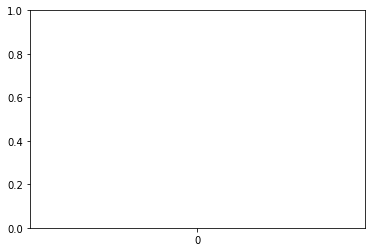

In [11]:
sns.boxplot()

In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df['Surname'].value_counts()

Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Aksakova    1 
Klein       1 
McGill      1 
Goforth     1 
Trout       1 
Name: Surname, Length: 2932, dtype: int64

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [17]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

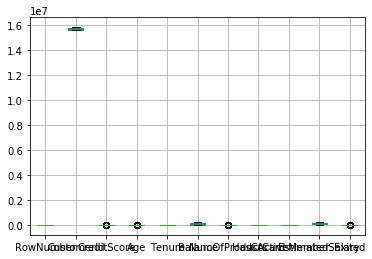

In [18]:
df.boxplot()

In [19]:
pearsoncorr = df.corr(method = 'pearson')

In [20]:
pearsoncorr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


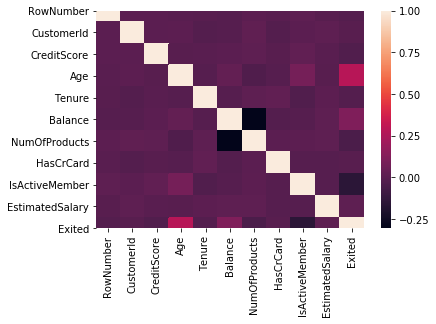

In [21]:
sns.heatmap(pearsoncorr) # should not apply heat map on catagorical features. No USE

### Before  performing Ch-sq distribution we have to amke sure that data is Label-encoded.

In [22]:
# Label Encoded ?? assign numerical value to catagorical features(column)

In [23]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Surname']= label_encoder.fit_transform(df['Surname'])

In [24]:
df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [25]:
# homework - types of encoding.

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Chi-Square

In [27]:
from sklearn.feature_selection import chi2

In [28]:
x= df.drop('Exited',axis=1)
y= df['Exited']

In [29]:
chi_score = chi2(x,y)

In [30]:
chi_score

(array([4.57638152e+03, 1.28730837e+02, 5.56133225e+02, 1.05403468e+02,
        1.18532506e+01, 5.15399263e+01, 2.30041748e+03, 3.27053797e+00,
        7.15130278e+06, 5.05539429e+00, 1.50040970e-01, 1.18199414e+02,
        4.83508818e+04]),
 array([0.00000000e+000, 7.76680092e-030, 5.83146756e-123, 9.96353608e-025,
        5.75607838e-004, 7.01557451e-013, 0.00000000e+000, 7.05344899e-002,
        0.00000000e+000, 2.45493956e-002, 6.98496209e-001, 1.56803624e-027,
        0.00000000e+000]))

### Here first array represent the chi sq score, and second array represent the p-value

In [31]:
x.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [32]:
chi_score[1]

array([0.00000000e+000, 7.76680092e-030, 5.83146756e-123, 9.96353608e-025,
       5.75607838e-004, 7.01557451e-013, 0.00000000e+000, 7.05344899e-002,
       0.00000000e+000, 2.45493956e-002, 6.98496209e-001, 1.56803624e-027,
       0.00000000e+000])

In [33]:
p_values = pd.Series(chi_score[1],index = x.columns)
p_values.sort_values(ascending = False, inplace = True)

In [34]:
p_values

HasCrCard          6.984962e-01 
Tenure             7.053449e-02 
NumOfProducts      2.454940e-02 
Geography          5.756078e-04 
Gender             7.015575e-13 
CreditScore        9.963536e-25 
IsActiveMember     1.568036e-27 
CustomerId         7.766801e-30 
Surname            5.831468e-123
EstimatedSalary    0.000000e+00 
Balance            0.000000e+00 
Age                0.000000e+00 
RowNumber          0.000000e+00 
dtype: float64

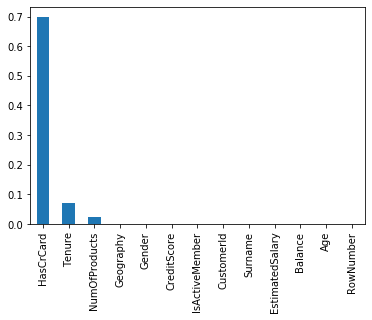

In [35]:
p_values.plot.bar()

#### Since HasCrCard has higher the p_value, this says that this variable is independent of the response and cannot be considered for model training.

In [36]:
from scipy.stats import stats

In [37]:
a=[4,3,2]
b=[2,4,6]
c=[2,1,3]

In [38]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=1.5, pvalue=0.2962962962962962)

In [39]:
import pandas as pd
import numpy as np
import math
import scipy
from statsmodels.api import OLS
import matplotlib.pyplot as plt